In [14]:
import librosa
import numpy as np
import os
import pickle 

In [15]:
def mfcc_mine(sr,audio):
    mfccs=librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=13)
    mfccs_array=np.array(mfccs.T)
    mfccs_processed=np.mean(mfccs.T,axis=0)
    return mfccs_processed


In [16]:
#---------------------------------#loading data----------------------------------
path1 = "/home/speechlab/Desktop/Drashti/infantknn/DAIICT_Dataset/Asthma"
print('total files of asthma:',len(os.listdir(path1)))
path2="/home/speechlab/Desktop/Drashti/infantknn/DAIICT_Dataset/Normal"
print('total files of normal:',len(os.listdir(path2)))
path3="/home/speechlab/Desktop/Drashti/infantknn/DAIICT_Dataset/HIE"
print('total files of HIE:',len(os.listdir(path3)))

total files of asthma: 182
total files of normal: 793
total files of HIE: 215


In [17]:
train_dataset =[]
train_labels=[]
train_extracted1=[]
train_extracted_del1=[]
train_extracted_ddel1=[]

# class Asthma
files = os.listdir(path1)
for i in files:
  string = path1 + '/'+i
  data,sr = librosa.load(string)
  train_dataset.append(data)
  train_labels.append('pathology')  
  feat=mfcc_mine(sr,data)  
  train_extracted1.append(feat)
train_extracted1=np.array(train_extracted1)
train_extracted_1=train_extracted1



In [18]:
train_extracted2=[]
train_extracted_del2=[]
train_extracted_ddel2=[]

# class normal
files = os.listdir(path2)
for i in files:
  string = path2 + '/'+i
  data,sr = librosa.load(string)
  train_dataset.append(data)
  train_labels.append('normal')  
  feat=mfcc_mine(sr,data)  
  train_extracted2.append(feat)
train_extracted2=np.array(train_extracted2)
train_extracted_2=train_extracted2



In [19]:
train_extracted3=[]
train_extracted_del3=[]
train_extracted_ddel3=[]

# class HIE
files = os.listdir(path3)
for i in files:
  string = path3 + '/'+i
  data,sr = librosa.load(string)
  train_dataset.append(data)
  train_labels.append('pathology')  
  feat=mfcc_mine(sr,data)  
  train_extracted3.append(feat) 
train_extracted3=np.array(train_extracted3)
train_extracted_3=train_extracted3



In [22]:
train_extracted_1=np.array(train_extracted_1)
train_extracted_2=np.array(train_extracted_2)
train_extracted_3=np.array(train_extracted_3)
train_extracted=0
train_extracted=np.vstack((train_extracted_1,train_extracted_2,train_extracted_3))
print(train_extracted.shape)



(1190, 13)


[['normal' 'pathology']
 ['793' '397']]


<BarContainer object of 2 artists>

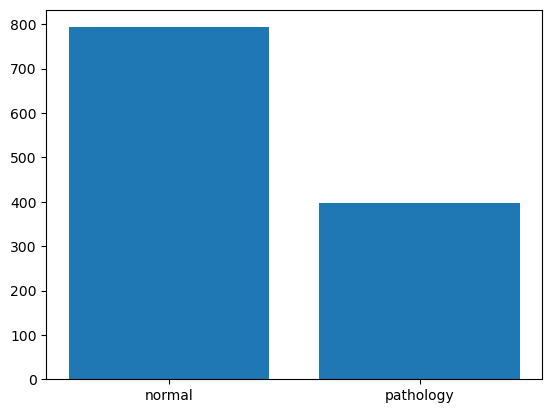

In [23]:
#----------------------------------#labels encoder-------------------------------
import matplotlib.pyplot as plt
from sklearn import preprocessing
unique,counts=np.unique(train_labels,return_counts=True)
print(np.asarray((unique,counts)))
label_encoder=preprocessing.LabelEncoder()
train_labels=label_encoder.fit_transform(train_labels)
uniques=['normal','pathology']
plt.bar(uniques,counts)


In [24]:
#----------------------------------#train test split------------------------------
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_extracted,train_labels,test_size=0.30,random_state=42)


In [25]:
#----------------------------------#training part---------------------------------------
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)
knnPickle = open('knnpickle_file', 'wb')     
# source, destination 
pickle.dump(classifier, knnPickle)  
# close the file
knnPickle.close()
